In [ ]:
#%matplotlib qt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

dir_path = r'train'
data_pattern = r'^.*_data\.csv$'
result_data = [f for f in os.listdir(dir_path) if re.match(data_pattern, f)]
events_pattern = r'^.*_events\.csv$'
result_events = [f for f in os.listdir(dir_path) if re.match(events_pattern, f)]

In [2]:
dir_path = r'train'
data_df_list = []
for file in result_data:
    df = pd.read_csv(os.path.join(dir_path, file))
    df.drop(['id'], axis=1, inplace=True) 
    data_df_list.append(df)

In [3]:
dir_path = r'train'
event_df_list = []
for file in result_events:
    df = pd.read_csv(os.path.join(dir_path, file))
    df.drop(['id'], axis=1, inplace=True) 
    event_df_list.append(df)

In [4]:
print(data_df_list[0].keys())
print(data_df_list[0].shape)

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'],
      dtype='object')
(262387, 32)


In [5]:
print(event_df_list[0].keys())

Index(['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff',
       'Replace', 'BothReleased'],
      dtype='object')


In [39]:
import mne
ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
       'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
ch_types = ['eeg'] * 32

In [40]:
info = mne.create_info(ch_names=ch_names, sfreq=500, ch_types=ch_types)
info


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
>

In [41]:
raw = mne.io.RawArray(data_df_list[0].T, info)

Creating RawArray with float64 data, n_channels=32, n_times=262387
    Range : 0 ... 262386 =      0.000 ...   524.772 secs
Ready.


In [42]:
raw

<RawArray | 32 x 262387 (524.8 s), ~64.1 MB, data loaded>

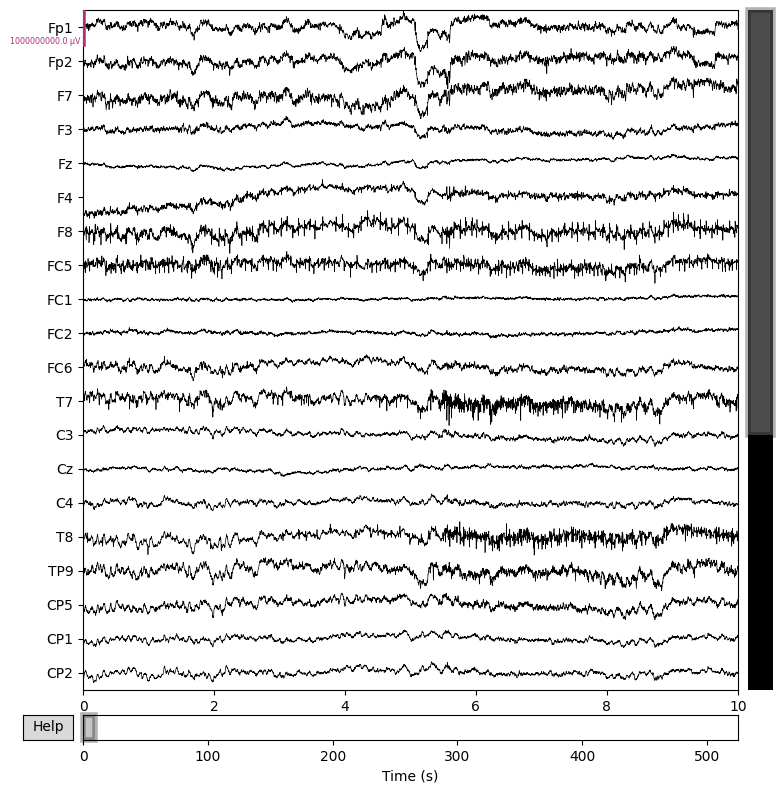

In [43]:
raw.plot(scalings={'eeg':500});

In [44]:
montage = mne.channels.make_standard_montage("standard_1020")

In [45]:
raw.set_montage(montage)

<RawArray | 32 x 262387 (524.8 s), ~64.1 MB, data loaded>

In [46]:
# event_df_list[0].keys()

In [47]:
# events = event_df_list[0]
# events.shape

In [48]:
# events[:,0]

In [49]:
# events = event_df_list[0]

# custom_fields = {}
# for i, column_name in enumerate(events.keys()):
#     custom_fields[column_name] = events[column_name].values

# # 创建注释对象
# annotations = mne.Annotations(onset=events[:, 0], duration=[0] * len(events), description='event', custom=custom_fields)

# # 将注释对象附加到原始数据中
# raw.set_annotations(annotations)

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


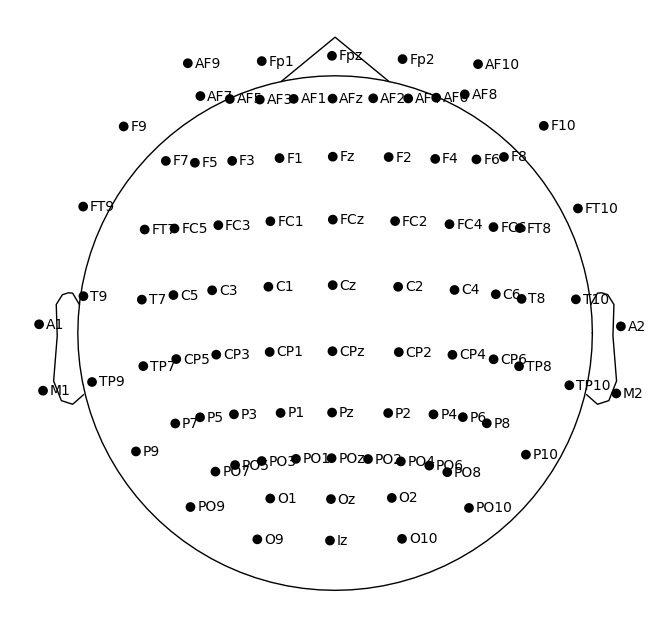

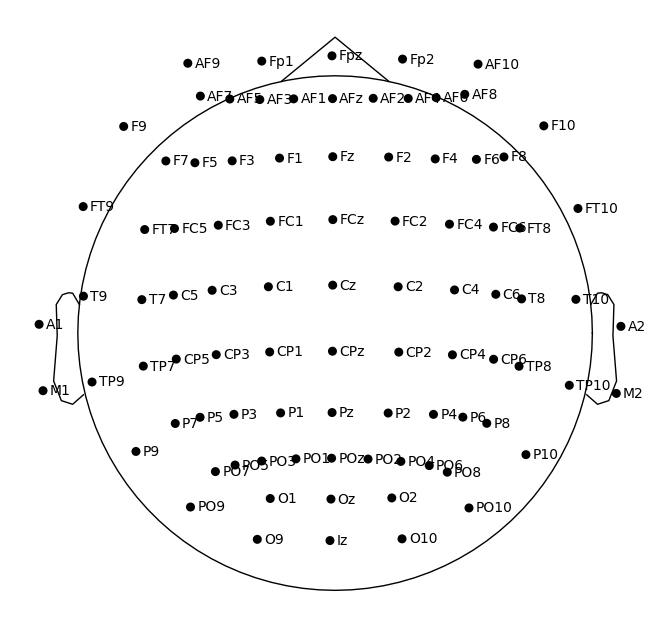

In [50]:
temp_montage = mne.channels.make_standard_montage('standard_1020')
temp_montage.plot()

In [51]:
# tmin = -0.1         # pre stimulis interval (in seconds) #
# tmax = 1.0          # post stimulus interval #

# # artifact rejection criteria
# reject = dict(eeg=100) # +/- 100µT

# # baseline correction
# baseline = (None, 0)

# # do the actual epoching processes
# epochs = mne.Epochs(raw, events = events, tmin = tmin, tmax = tmax,
#                     baseline=baseline, preload = True,
#                     reject=reject)
# epochs

In [92]:
filtered_raw = raw.copy()  # 复制原始数据以保留原始数据
filtered_raw = filtered_raw.filter(l_freq=2, h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 825 samples (1.650 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished


In [97]:
tstep = 1.0
events_ica = mne.make_fixed_length_events(filtered_raw, duration=tstep)
epochs_ica = mne.Epochs(filtered_raw, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

Not setting metadata
524 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 524 events and 501 original time points ...
0 bad epochs dropped


In [98]:
from autoreject import get_rejection_threshold

reject = get_rejection_threshold(epochs_ica);
reject

Estimating rejection dictionary for eeg


{'eeg': 5389.591749517512}

In [99]:
# ICA parameters
random_state = 42   # ensures ICA is reproducable each time it's run
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )
ica.fit(epochs_ica,
        reject=reject,
        tstep=tstep)

Fitting ICA to data using 32 channels (please be patient, this may take a while)


C:\Users\xuan\AppData\Local\Temp\ipykernel_13928\4288590099.py:9: RuntimeWarning: The following parameters passed to ICA.fit() will be ignored, as they only affect raw data (and it appears you passed epochs): reject
  ica.fit(epochs_ica,


Selecting by explained variance: 22 components
Fitting ICA took 3.5s.


Method,fastica
Fit,21 iterations on epochs (262524 samples)
ICA components,22
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,—


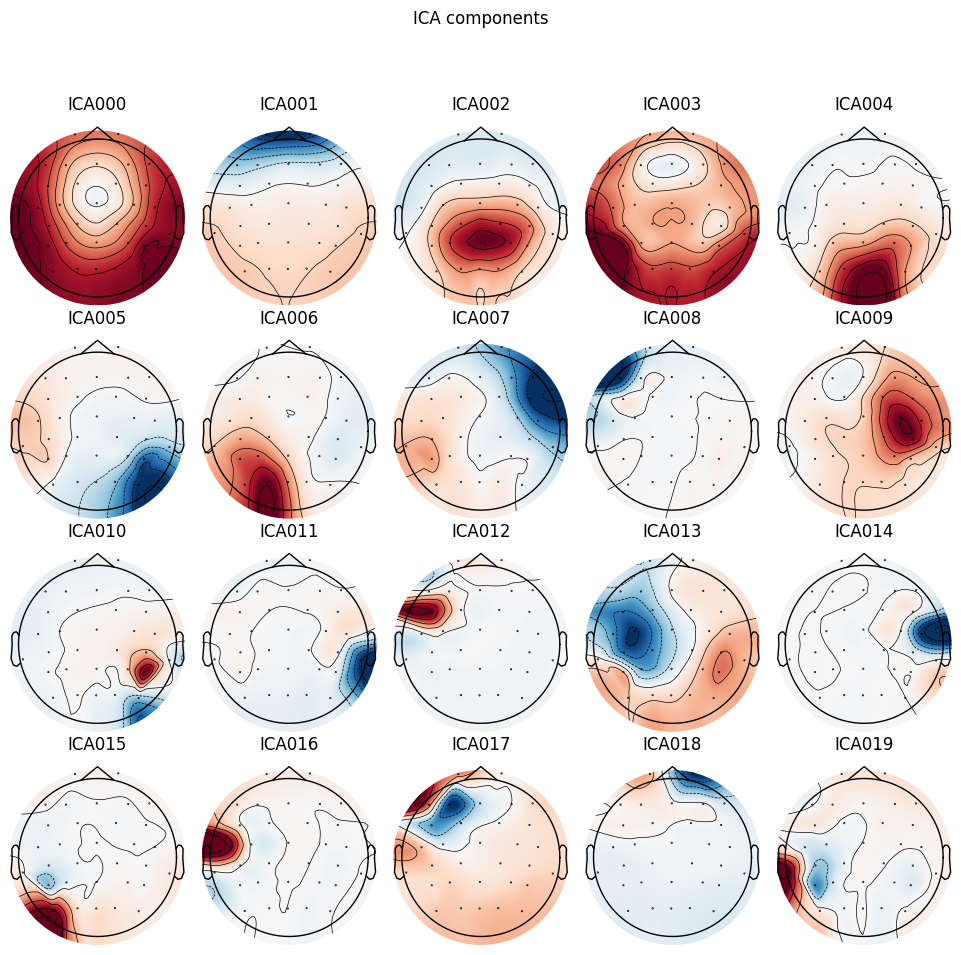

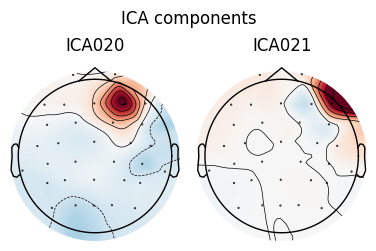

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 390x260.5 with 2 Axes>]

In [100]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
262 matching events found
No baseline correction applied
0 projection items activated


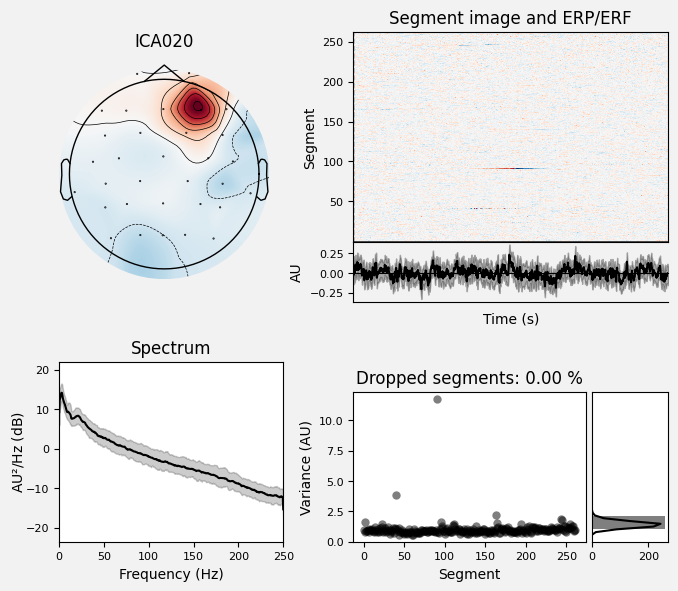

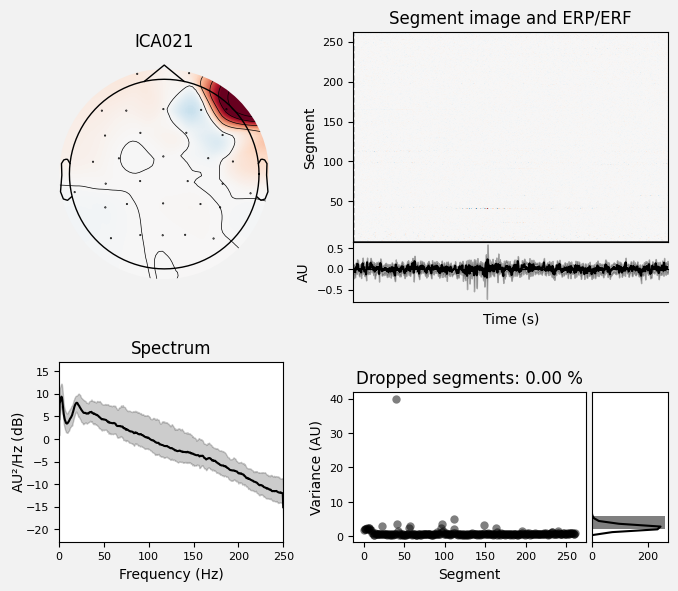

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [115]:
# ica.plot_properties(filtered_raw, picks=range(0, ica.n_components_))
ica.plot_properties(filtered_raw, picks=[20,21])

In [116]:
# 根据拓扑图选择要去除的组件
components_to_exclude = [1]

# 将选定的组件添加到 exclude 属性中
ica.exclude = components_to_exclude
ica.apply(filtered_raw)

Applying ICA to Raw instance
    Transforming to ICA space (22 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components


<RawArray | 32 x 262387 (524.8 s), ~64.1 MB, data loaded>

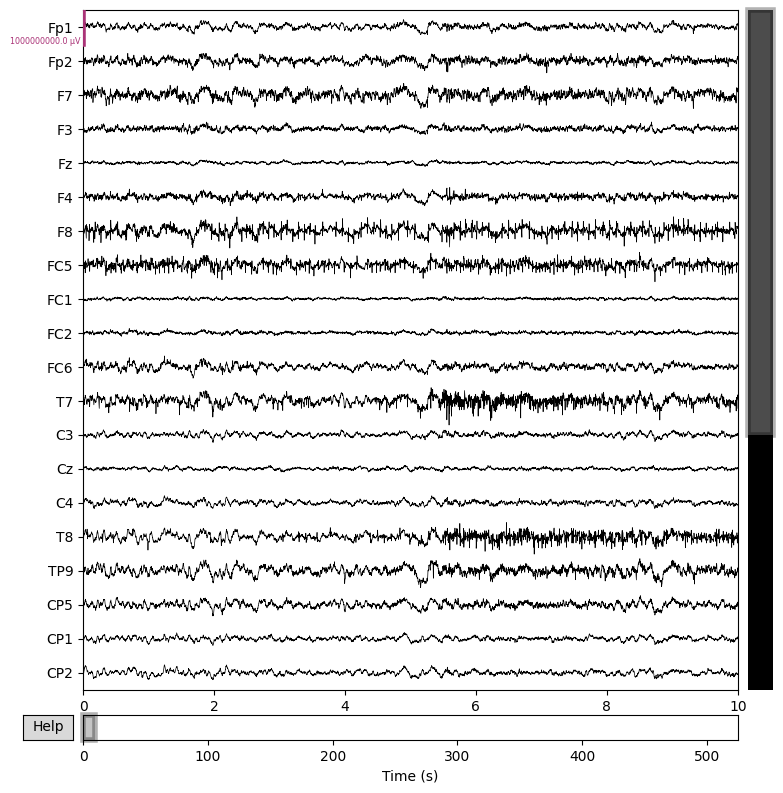

In [117]:
# filtered_raw.plot(scalings={'eeg':500});
filtered_raw.plot(scalings={'eeg':500});

In [122]:
processed_data = filtered_raw.get_data()
filtered_raw.save('processed_data.fif', overwrite=True)

Overwriting existing file.
Writing C:\Users\xuan\Desktop\Programming\BrainHackSchool\BCI Project\grasp-and-lift-eeg-detection\processed_data.fif
Closing C:\Users\xuan\Desktop\Programming\BrainHackSchool\BCI Project\grasp-and-lift-eeg-detection\processed_data.fif
[done]


C:\Users\xuan\AppData\Local\Temp\ipykernel_13928\2781693775.py:2: RuntimeWarning: This filename (C:\Users\xuan\Desktop\Programming\BrainHackSchool\BCI Project\grasp-and-lift-eeg-detection\processed_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  filtered_raw.save('processed_data.fif', overwrite=True)


In [145]:
from mne.time_frequency import tfr_morlet
import matplotlib.pyplot as plt

tstep = 1.0
rmica_events_ica = mne.make_fixed_length_events(filtered_raw, duration=tstep)
rmica_epochs_ica = mne.Epochs(filtered_raw, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

# 设置小波变换参数
frequencies = [2:5:40]  # 感兴趣的频率范围
n_cycles = [f / 2.0 for f in frequencies]   # 每个频率的小波周期数

# 应用小波变换
# power = tfr_morlet(rmica_epochs_ica, freqs=frequencies, n_cycles=n_cycles, average=True)

# 应用小波变换
tfr = tfr_morlet(rmica_epochs_ica, freqs=frequencies, n_cycles=n_cycles, average=True)

# 获取感兴趣频率范围的时频数据
roi_tfr = [tfr_i.crop(fmin=min(frequencies), fmax=max(frequencies)) for tfr_i in tfr]



SyntaxError: invalid syntax (1557023725.py, line 12)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


C:\Users\xuan\anaconda3\lib\site-packages\mne\time_frequency\tfr.py:1725: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figs = [plt.figure() for i in range(n_picks)]


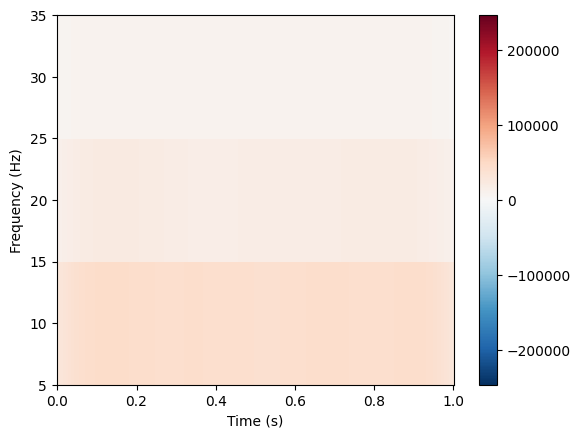

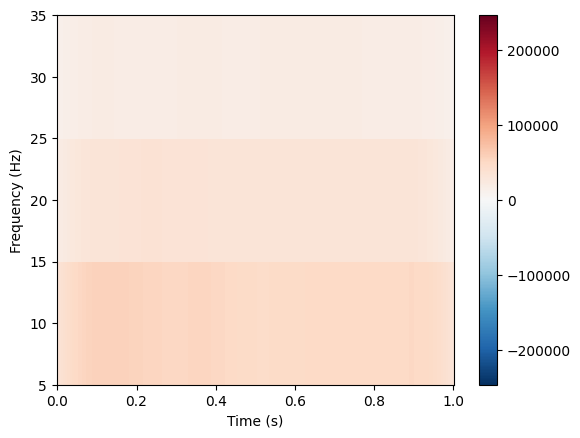

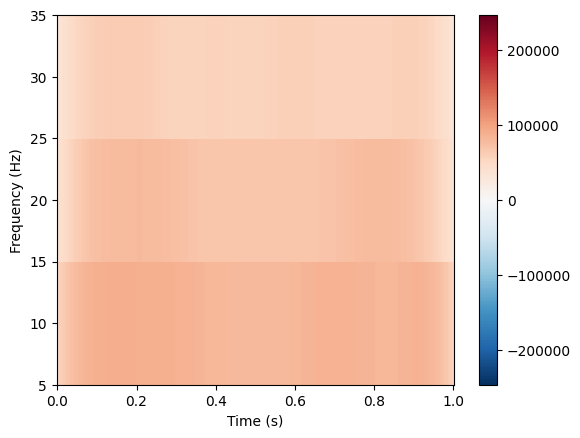

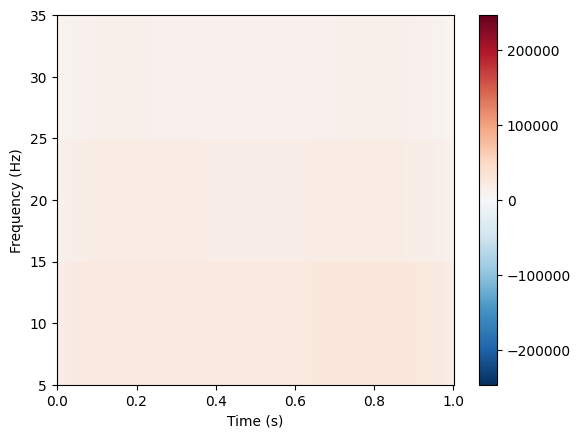

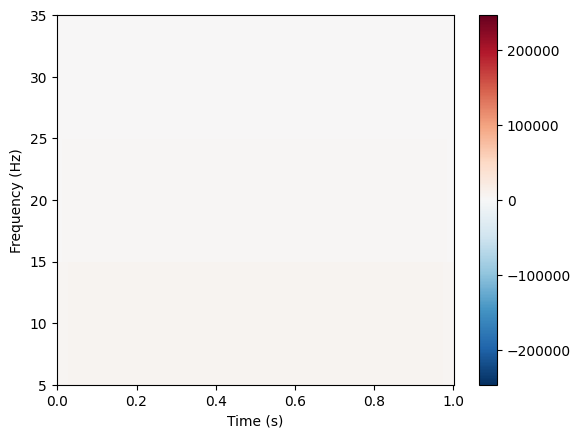

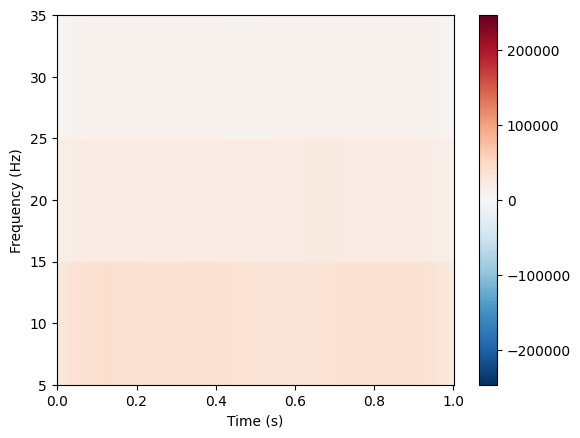

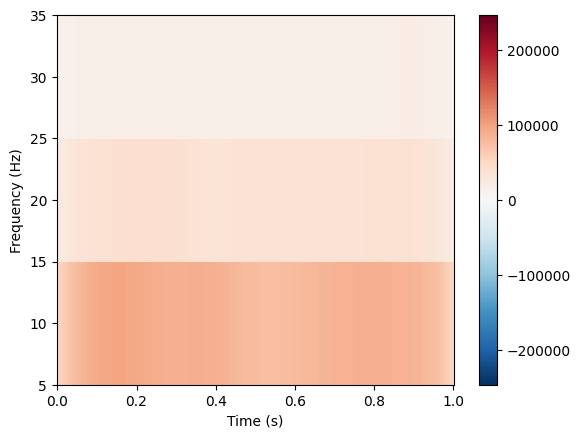

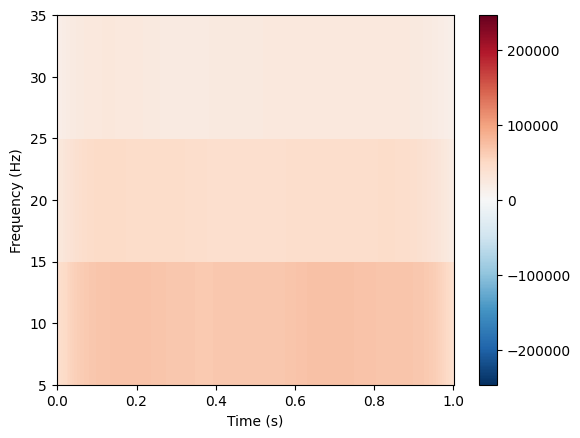

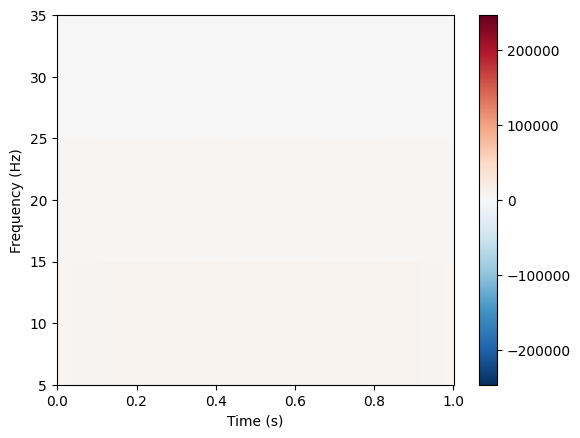

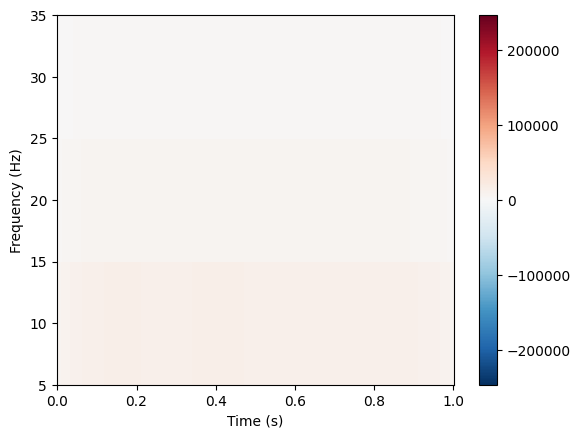

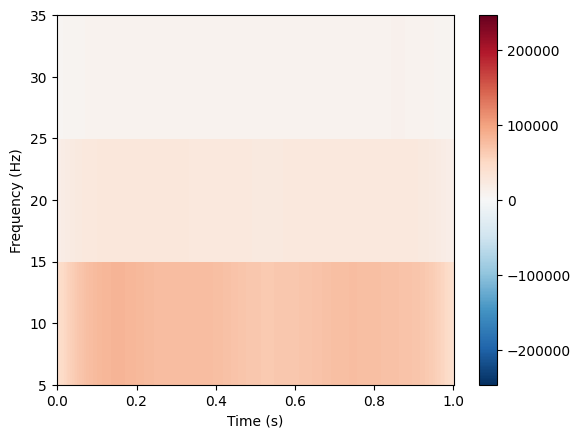

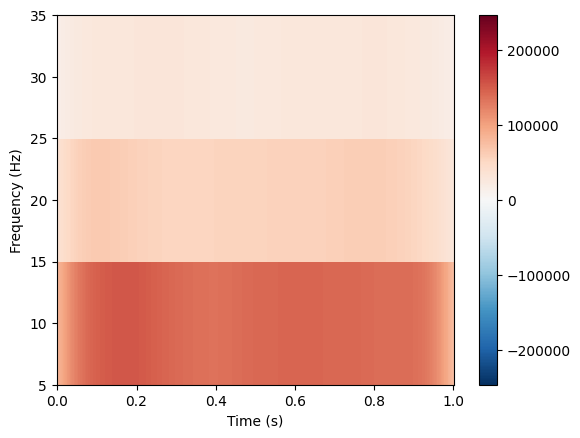

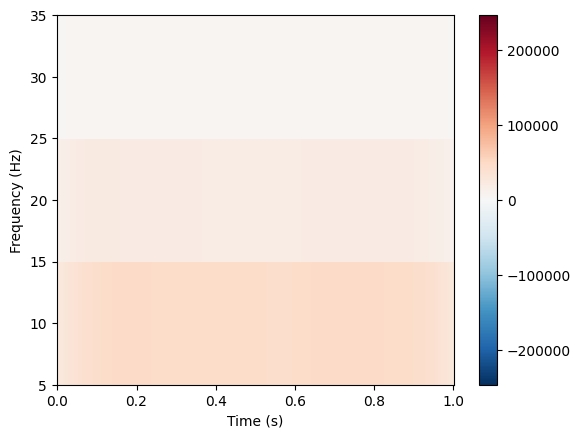

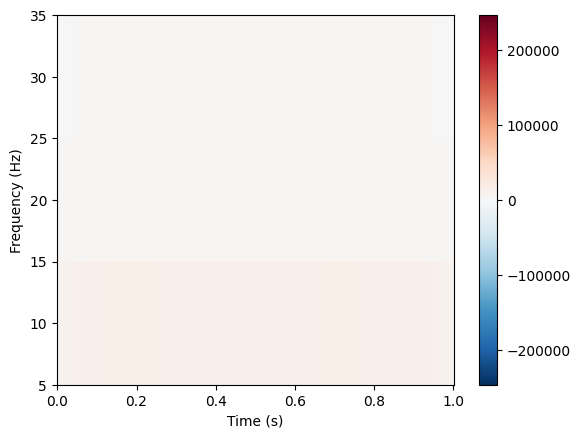

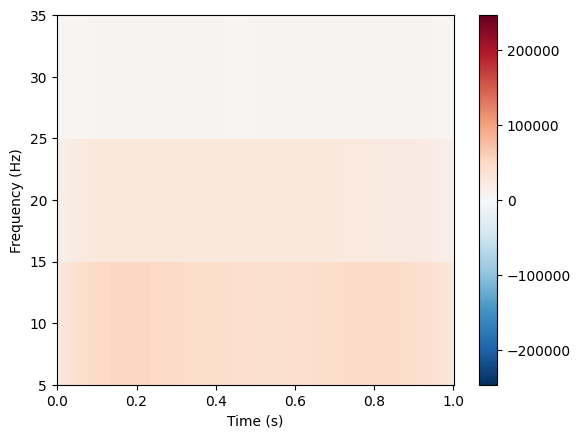

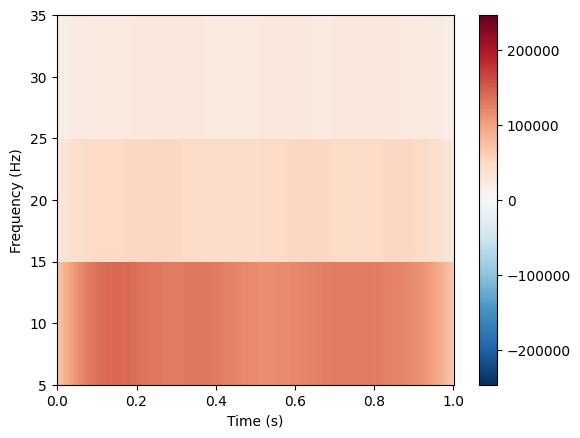

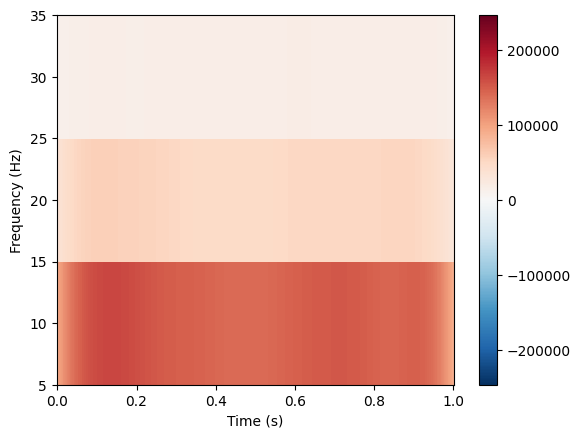

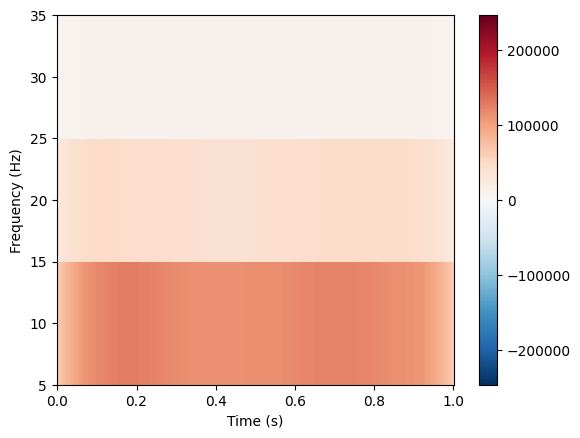

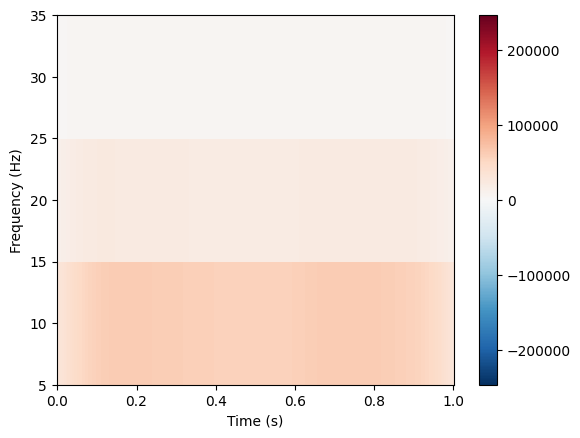

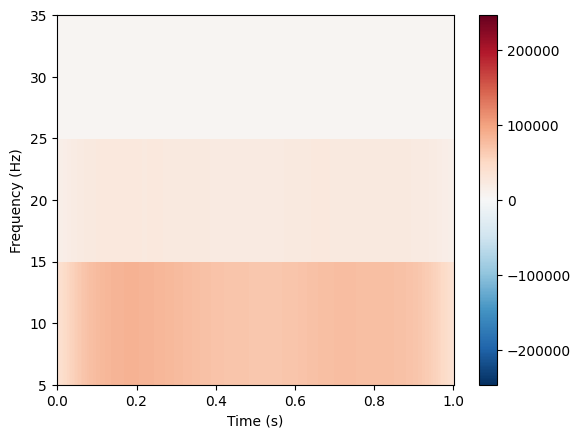

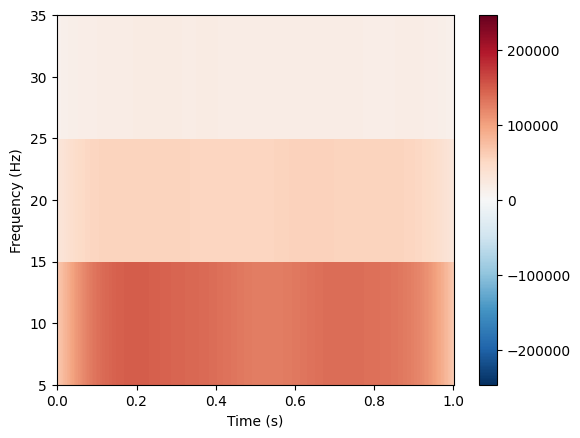

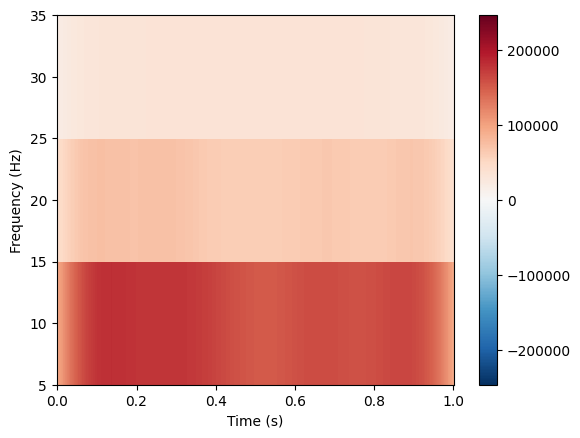

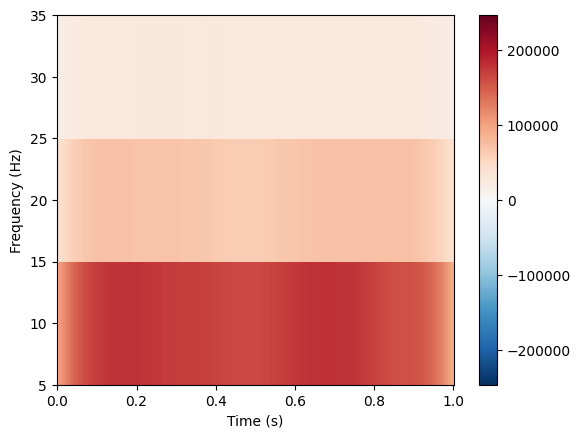

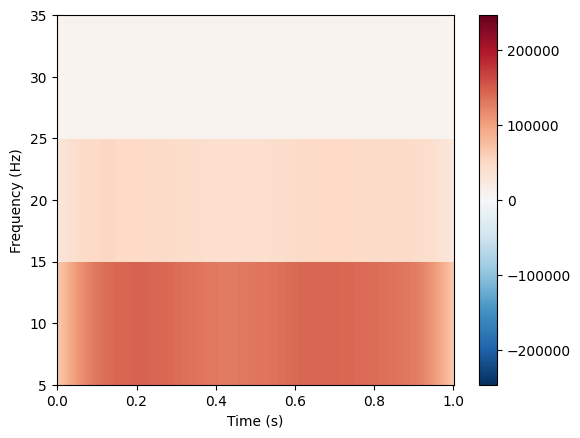

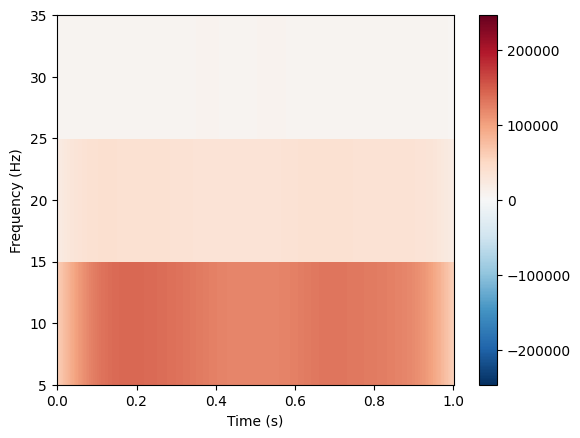

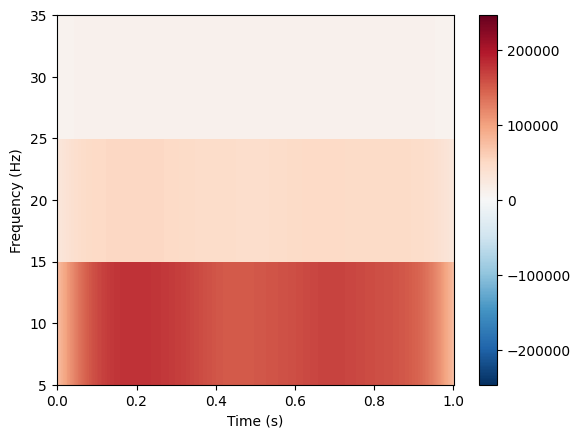

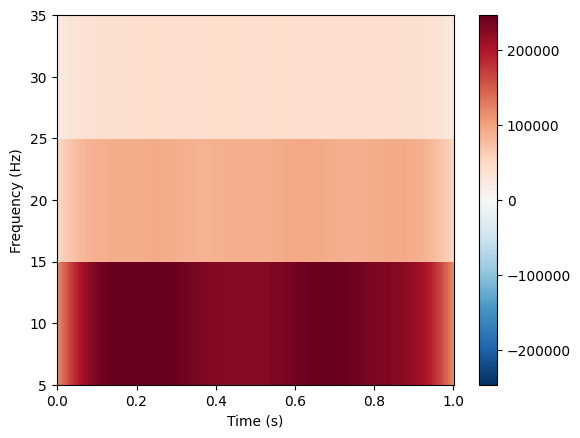

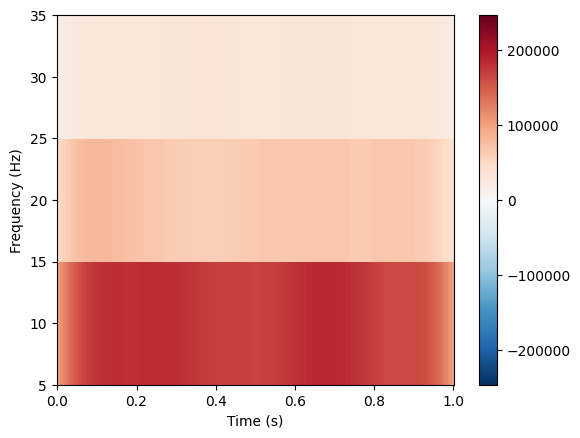

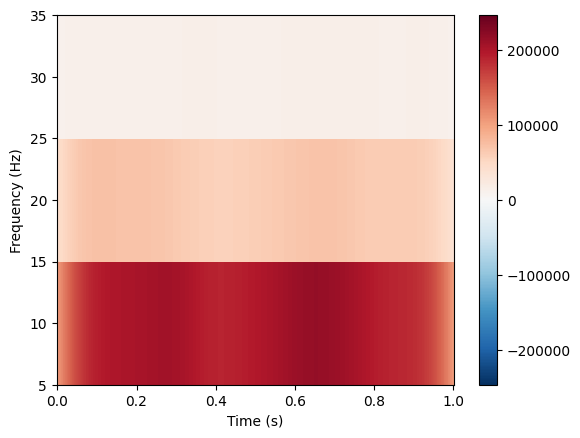

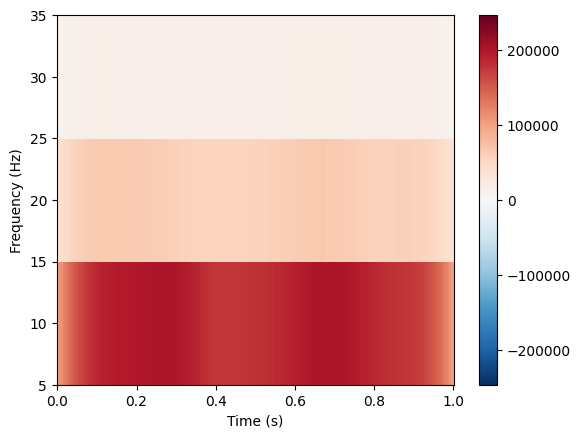

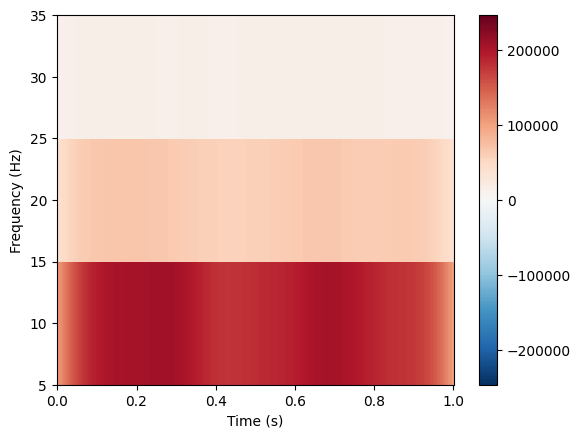

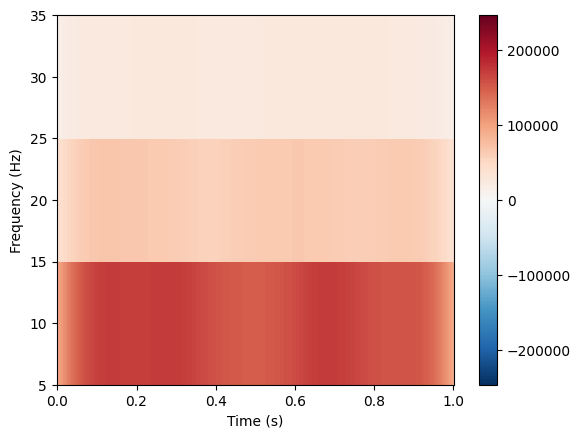

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


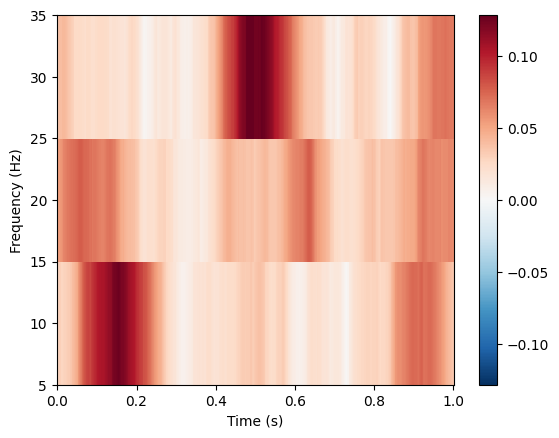

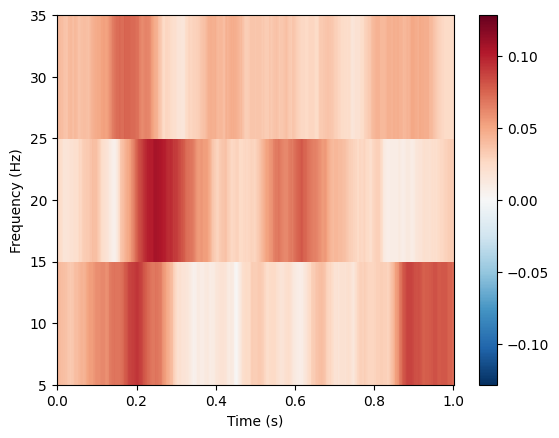

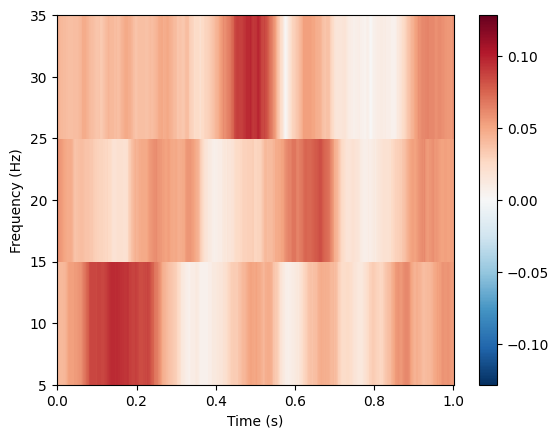

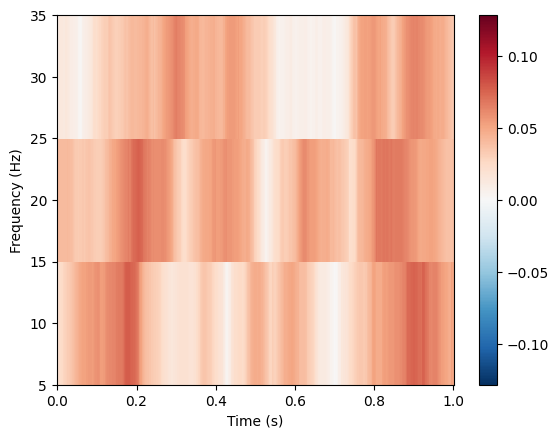

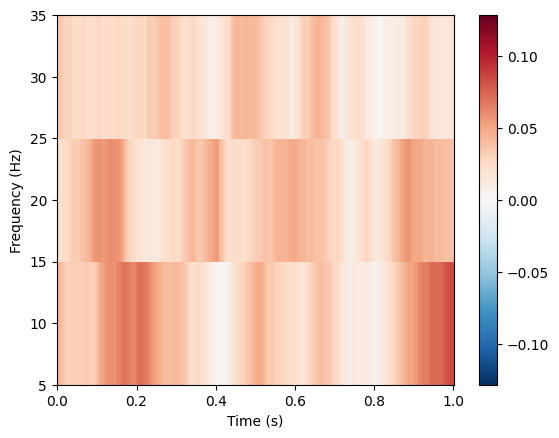

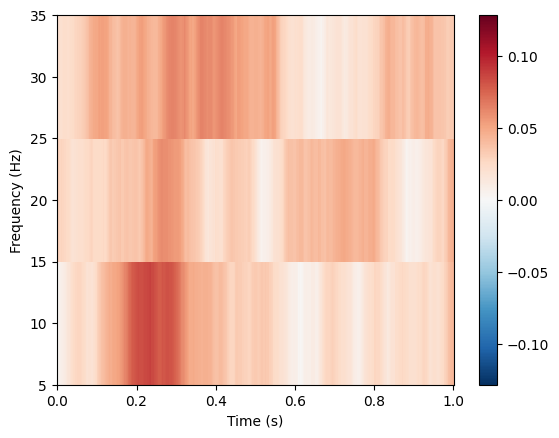

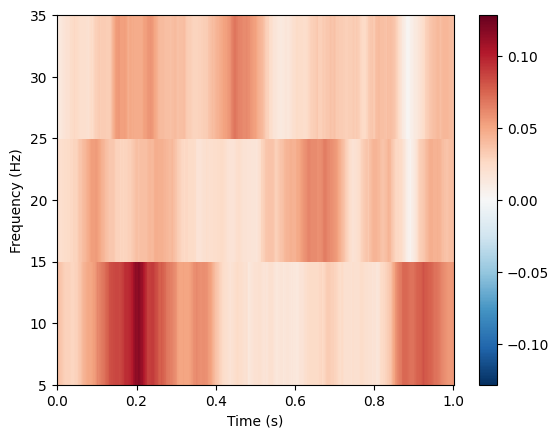

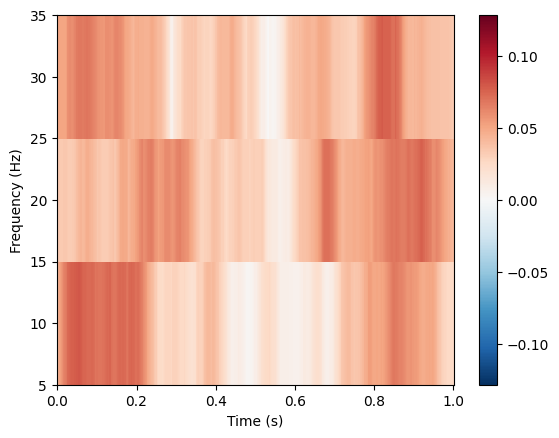

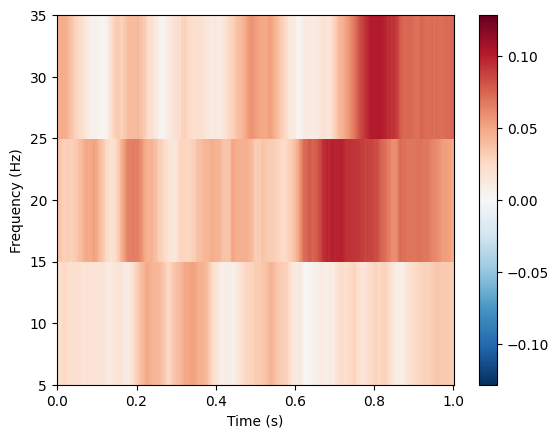

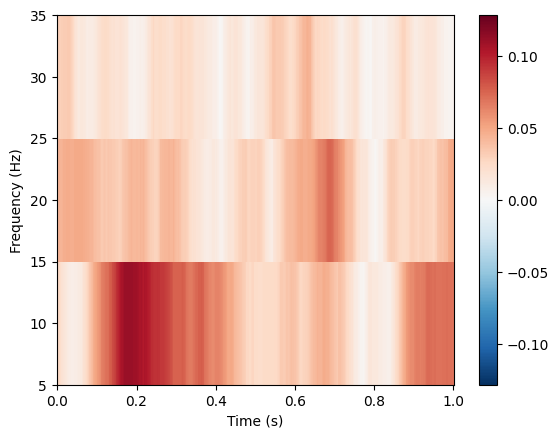

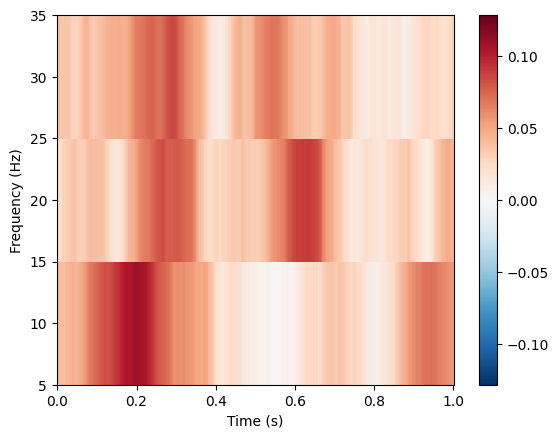

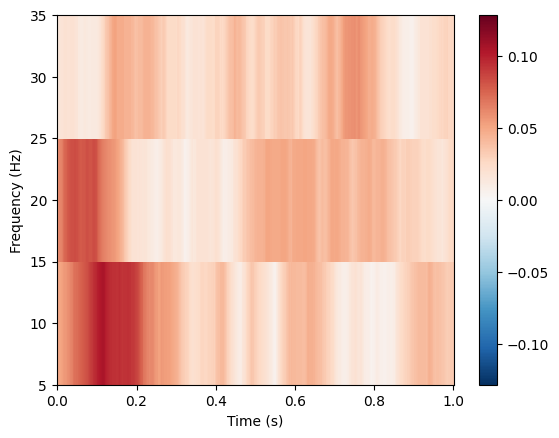

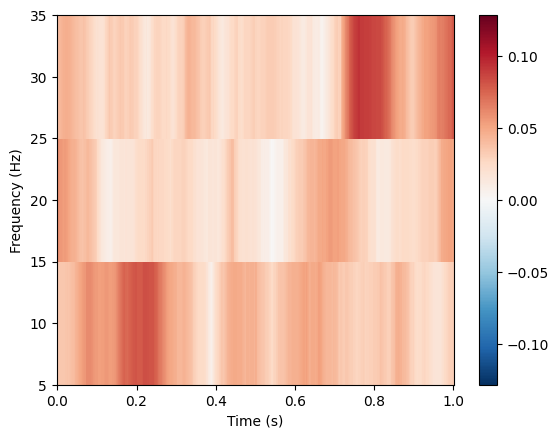

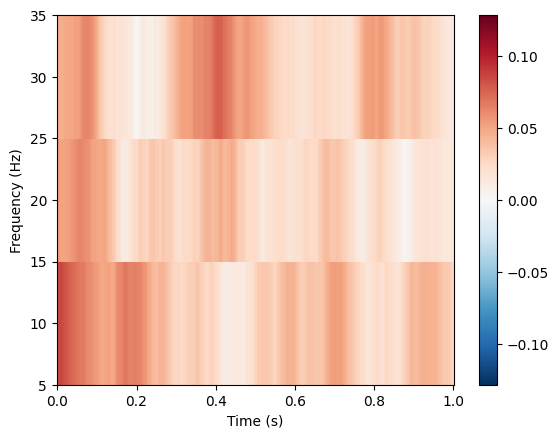

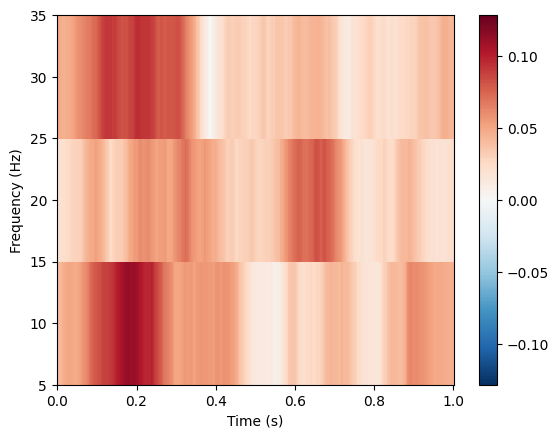

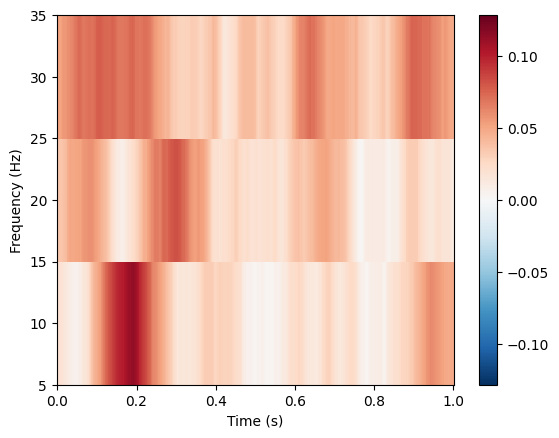

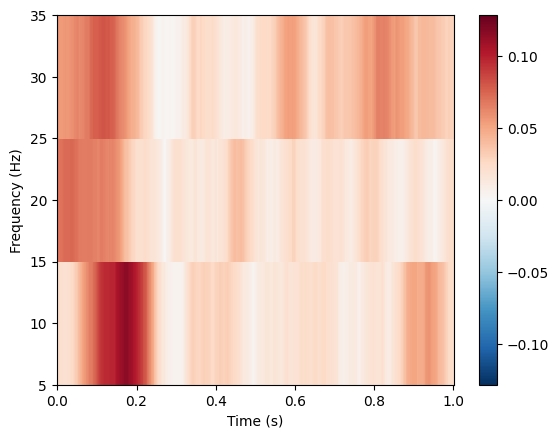

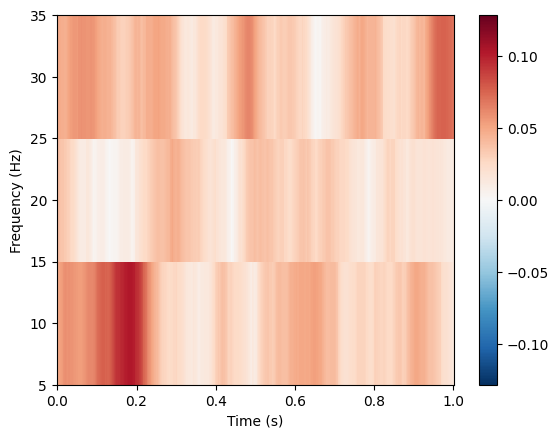

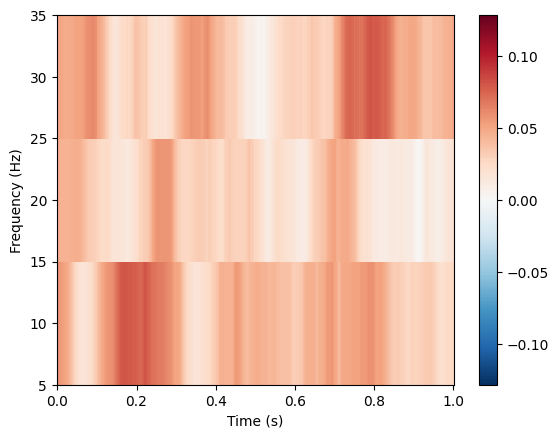

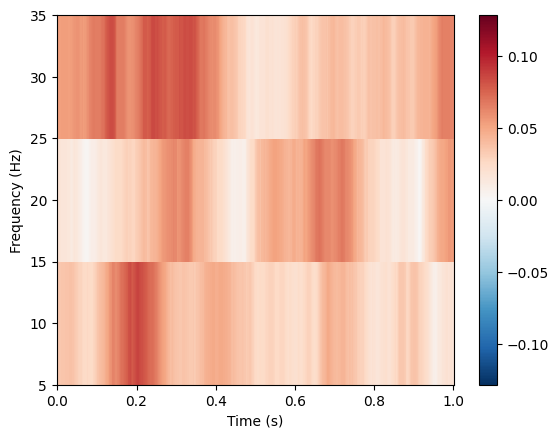

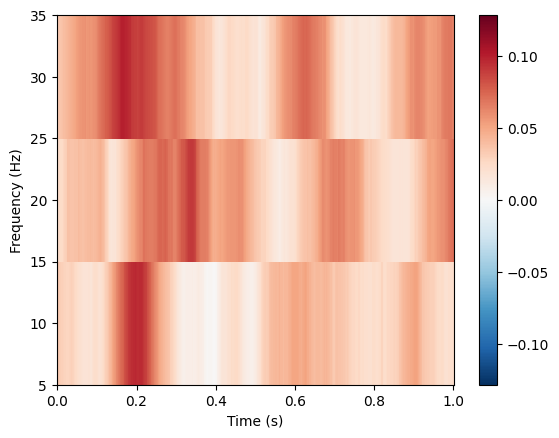

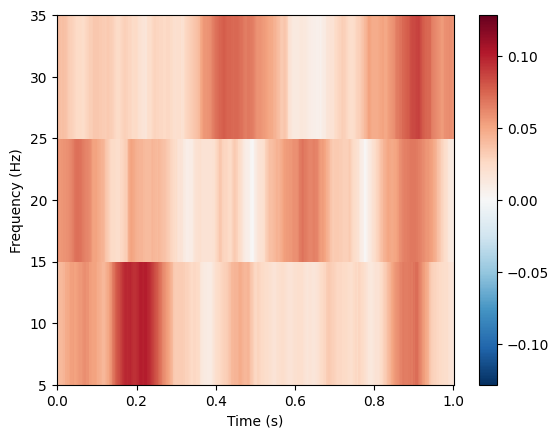

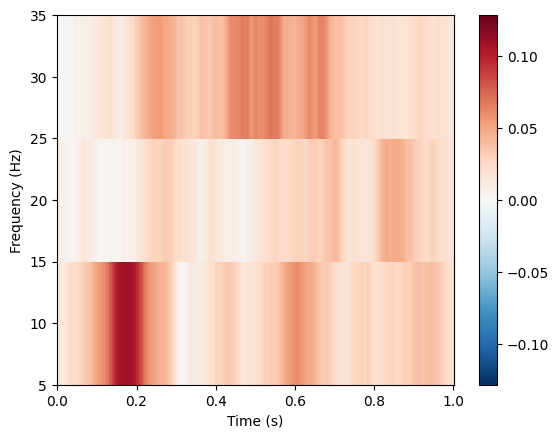

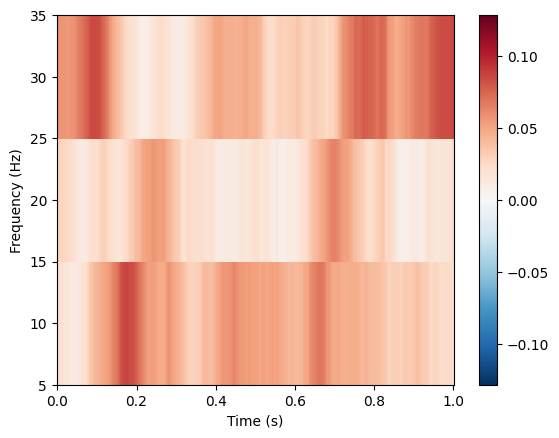

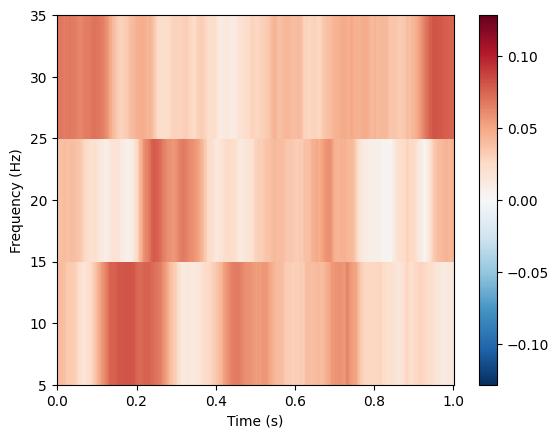

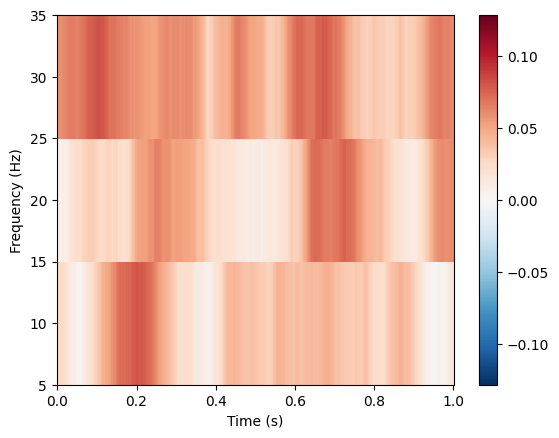

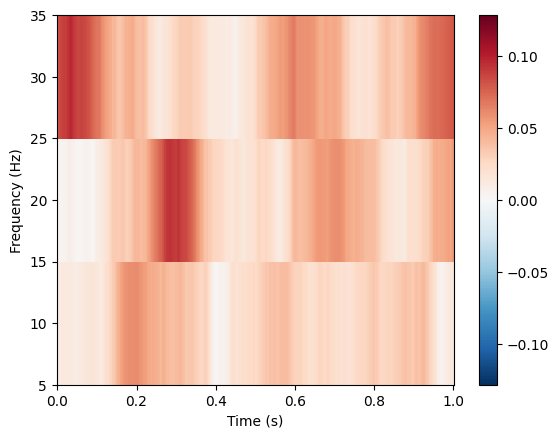

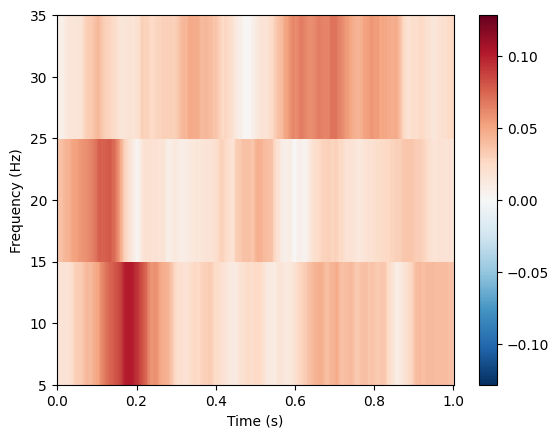

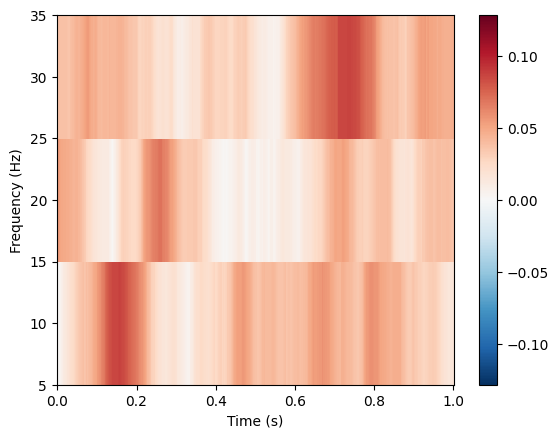

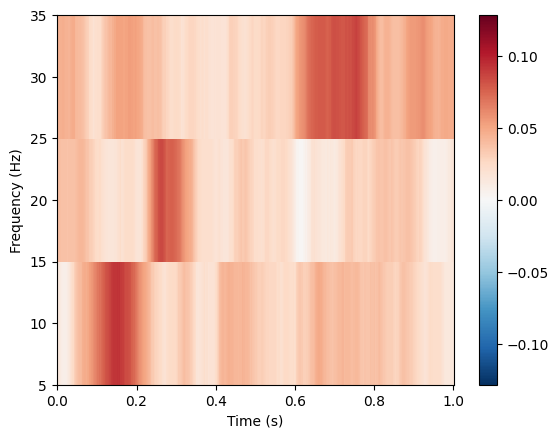

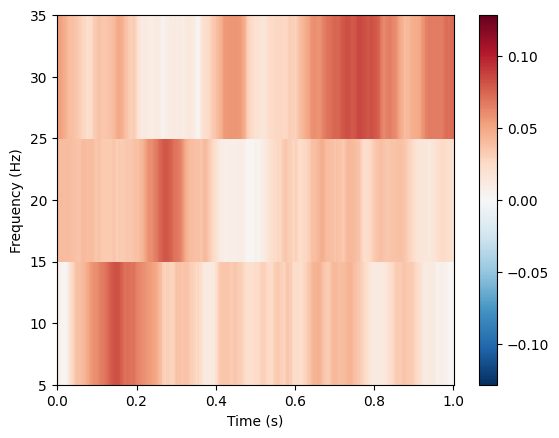

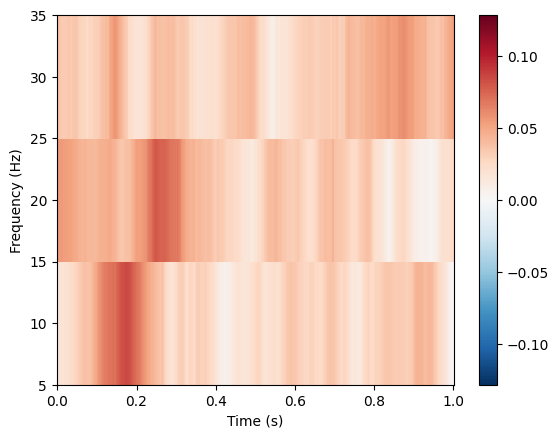

In [143]:
# 绘制时频图
for roi_tfr_i in roi_tfr:
    roi_tfr_i.plot()